<a href="https://colab.research.google.com/github/Aleena24/Predictive_Analysis/blob/main/Customer_Sales_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [11]:
df = pd.read_csv('/content/Retail.csv', encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


# Preprocessing

Data Cleaning and Preparation



In [13]:
print(df.isnull().sum())
df = df.dropna(subset=['CustomerID'])
df = df.drop_duplicates()
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.head()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


Descriptive statistics

In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True, errors='coerce')
print(df['InvoiceDate'].isnull().sum())
df = df.dropna(subset=['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['InvoiceDate'].describe()

0


,InvoiceDate
count,392692
mean,2011-07-10 19:13:07.771892480
min,2010-12-01 08:26:00
25%,2011-04-07 11:12:00
50%,2011-07-31 12:02:00
75%,2011-10-20 12:53:00
max,2011-12-09 12:50:00


# Sales Analysis

Top 10 best-selling products by quantity

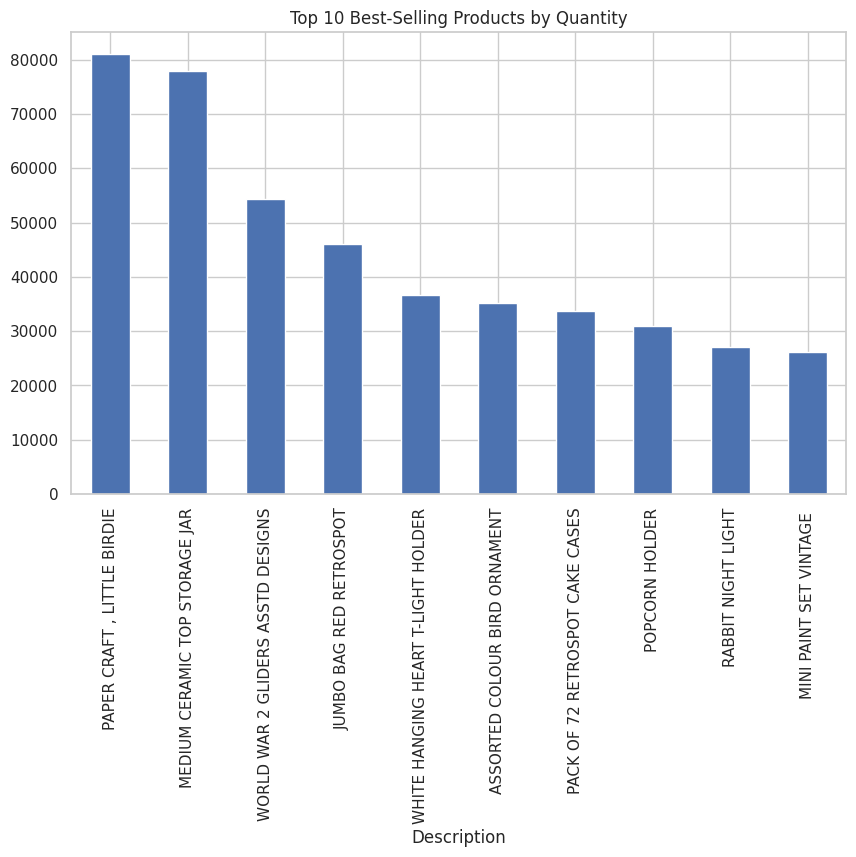

In [20]:
best_selling_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

#Viz
best_selling_products.plot(kind='bar', figsize=(10,6), title="Top 10 Best-Selling Products by Quantity")
plt.show()

 Total revenue generated by each product

In [23]:
df['Total Revenue'] = df['Quantity'] * df['UnitPrice']
product_revenue = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)
product_revenue.head(10)


,TotalSales
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142264.75
WHITE HANGING HEART T-LIGHT HOLDER,100392.10
JUMBO BAG RED RETROSPOT,85040.54
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POSTAGE,77803.96
PARTY BUNTING,68785.23
ASSORTED COLOUR BIRD ORNAMENT,56413.03
Manual,53419.93
